In [2]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = [12, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np
import scipy.constants as spc

z_0 =  6.28318530718
-6.26626626627 6.26626626627 The wavefront is bent the most at z = +/-z_0


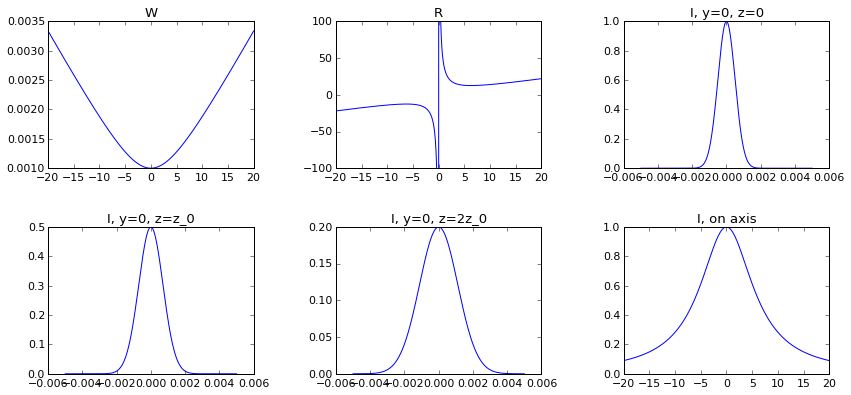

In [4]:
# 2
wave = 500.0e-9
W_0 = 0.001
I_0 = 1.0
z = np.linspace(-20,20,1000)
z_0 = np.pi*W_0**2/wave
print 'z_0 = ', z_0
W = W_0*(1.0+(z/z_0)**2)**0.5
R = z*(1.0+(z_0/z)**2)

fig = plt.figure(figsize=[14, 10])
gs = matplotlib.gridspec.GridSpec(3, 3, width_ratios=[20, 20, 20], wspace=0.4, hspace=0.4)
plt.subplot(gs[0])
plt.plot(z,W)
plt.title('W')
plt.subplot(gs[1])
plt.plot(z,R)
plt.ylim([-100,100])
plt.title('R')
neg_smallest_R = z[np.argmax(R[:400])]
pos_smallest_R = z[(600+np.argmin(R[600:]))]
print neg_smallest_R, pos_smallest_R, 'The wavefront is bent the most at z = +/-z_0'

plt.subplot(gs[2])
x = np.linspace(-0.005,0.005,1000)
z = 0.0
W = W_0*(1.0+(z/z_0)**2)**0.5
I = I_0*W_0**2/W**2*np.exp(-2.0*(x**2)/W**2) #*np.exp(0.0-2.0*1j*np.arctan(z/z_0))
plt.plot(x,I)
plt.title('I, y=0, z=0')

plt.subplot(gs[3])
z = z_0
W = W_0*(1.0+(z/z_0)**2)**0.5
R = z*(1.0+(z_0/z)**2)
I = I_0*W_0**2/W**2*np.exp(-2.0*(x**2)/W**2)
plt.plot(x,I)
plt.title('I, y=0, z=z_0')

plt.subplot(gs[4])
z = 2.0*z_0
W = W_0*(1.0+(z/z_0)**2)**0.5
R = z*(1.0+(z_0/z)**2)
I = I_0*W_0**2/W**2*np.exp(-2.0*(x**2)/W**2)
plt.plot(x,I)
plt.title('I, y=0, z=2z_0')

plt.subplot(gs[5])
z = np.linspace(-20,20,1000)
W = W_0*(1.0+(z/z_0)**2)**0.5
R = z*(1.0+(z_0/z)**2)
I = I_0*W_0**2/W**2
plt.plot(z,I)
plt.title('I, on axis')


<matplotlib.contour.QuadContourSet instance at 0x000000000ACC7708>

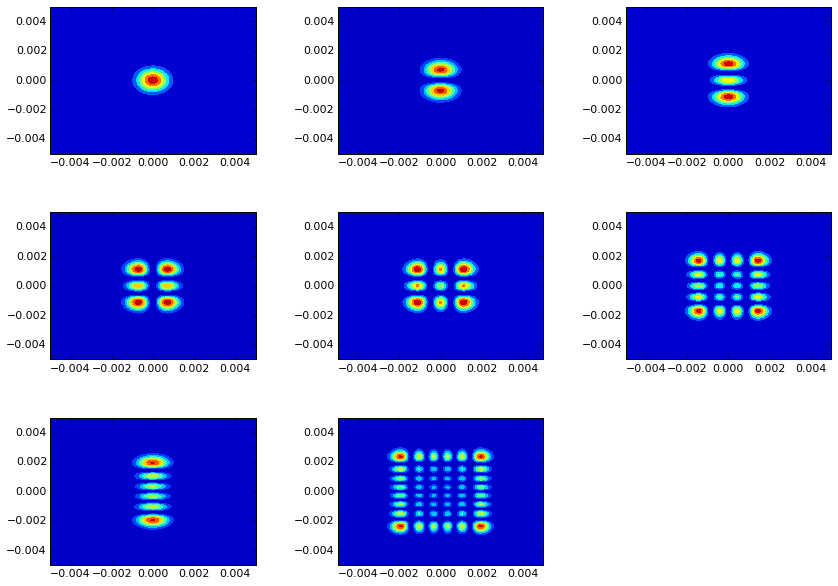

In [3]:
# 3
I_0 = 1.0
W_0 = 0.001 #m
x = np.linspace(-0.005,0.005,100)
y = np.linspace(-0.005,0.005,100)
W = W_0
u_x = (np.sqrt(2)*x/W)
u_y = (np.sqrt(2)*y/W)

H_l = np.zeros((100,8))
H_l[:,0] = u_x*0+1.0
H_l[:,1] = 2.0*u_x
H_l[:,2] = 4.0*u_x**2-2.0
H_l[:,3] = 8.0*u_x**3-12.0*u_x
H_l[:,4] = 16.0*u_x**4-48.0*u_x**2+12.0
H_l[:,5] = 32.0*u_x**5-160.0*u_x**3+120.0*u_x
H_l[:,6] = 64.0*u_x**6-480.0*u_x**4+720.0*u_x**2-120.0
H_l[:,7] = 128.0*u_x**7-1344.0*u_x**5+3360.0*u_x**3-1680.0*u_x

H_m = np.zeros((100,8))
H_m[:,0] = u_y*0+1.0
H_m[:,1] = 2.0*u_y
H_m[:,2] = 4.0*u_y**2-2.0
H_m[:,3] = 8.0*u_y**3-12.0*u_y
H_m[:,4] = 16.0*u_y**4-48.0*u_y**2+12.0
H_m[:,5] = 32.0*u_y**5-160.0*u_y**3+120.0*u_y
H_m[:,6] = 64.0*u_y**6-480.0*u_y**4+720.0*u_y**2-120.0
H_m[:,7] = 128.0*u_y**7-1344.0*u_y**5+3360.0*u_y**3-1680.0*u_y

fig = plt.figure(figsize=[14, 10])
gs = matplotlib.gridspec.GridSpec(3, 3, width_ratios=[20, 20, 20], wspace=0.4, hspace=0.4)
plt.subplot(gs[0])
X, Y = np.meshgrid(x, y)

G_l = H_l[:,0]*np.exp(-u_x**2/2.0)
G_m = H_m[:,0]*np.exp(-u_y**2/2.0)
G_m = G_m.reshape(len(G_m),1)
I = I_0*(W_0/W)**2*G_l**2*G_m**2

plt.contourf(X, Y, I)
#plt.show()

plt.subplot(gs[1])
G_l = H_l[:,0]*np.exp(-u_x**2/2.0)
G_m = H_m[:,1]*np.exp(-u_y**2/2.0)
G_m = G_m.reshape(len(G_m),1)
I = I_0*(W_0/W)**2*G_l**2*G_m**2
plt.contourf(X, Y, I)

plt.subplot(gs[2])
G_l = H_l[:,0]*np.exp(-u_x**2/2.0)
G_m = H_m[:,2]*np.exp(-u_y**2/2.0)
G_m = G_m.reshape(len(G_m),1)
I = I_0*(W_0/W)**2*G_l**2*G_m**2
plt.contourf(X, Y, I)

plt.subplot(gs[3])
G_l = H_l[:,1]*np.exp(-u_x**2/2.0)
G_m = H_m[:,2]*np.exp(-u_y**2/2.0)
G_m = G_m.reshape(len(G_m),1)
I = I_0*(W_0/W)**2*G_l**2*G_m**2
plt.contourf(X, Y, I)

plt.subplot(gs[4])
G_l = H_l[:,2]*np.exp(-u_x**2/2.0)
G_m = H_m[:,2]*np.exp(-u_y**2/2.0)
G_m = G_m.reshape(len(G_m),1)
I = I_0*(W_0/W)**2*G_l**2*G_m**2
plt.contourf(X, Y, I)

plt.subplot(gs[5])
G_l = H_l[:,3]*np.exp(-u_x**2/2.0)
G_m = H_m[:,4]*np.exp(-u_y**2/2.0)
G_m = G_m.reshape(len(G_m),1)
I = I_0*(W_0/W)**2*G_l**2*G_m**2
plt.contourf(X, Y, I)

plt.subplot(gs[6])
G_l = H_l[:,0]*np.exp(-u_x**2/2.0)
G_m = H_m[:,5]*np.exp(-u_y**2/2.0)
G_m = G_m.reshape(len(G_m),1)
I = I_0*(W_0/W)**2*G_l**2*G_m**2
plt.contourf(X, Y, I)

plt.subplot(gs[7])
G_l = H_l[:,5]*np.exp(-u_x**2/2.0)
G_m = H_m[:,7]*np.exp(-u_y**2/2.0)
G_m = G_m.reshape(len(G_m),1)
I = I_0*(W_0/W)**2*G_l**2*G_m**2
plt.contourf(X, Y, I)

#fig, axs = plt.subplots(1,2)
#X, Y = np.meshgrid(x, y)
#cs = axs[0].contourf(X, Y, I)#, levels=np.linspace(0, 10, 10))

#plt.contour(x,y,I)
#plt.show()